In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Examen - Pregunta 2

In [96]:
desestabilizado_no = [0] * 74 
desestabilizado_no.extend([1]*12)

In [98]:
desestabilizado_si = [0] * 5 
desestabilizado_si.extend([1]*4)

In [97]:
desestabilizado_no

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [99]:
desestabilizado_si

[0, 0, 0, 0, 0, 1, 1, 1, 1]

# Examen - Pregunta 3

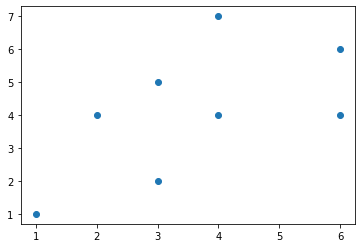

In [41]:
x1 = [1,2,3,3,4,4,6,6]
x2 = [1,4,2,5,4,7,4,6]

plt.scatter(x1, x2)

# Examen -  Ejercicio 4

In [3]:
d = {
    "peso": [849, 850, 950, 1640, 150, 750, 600, 875, 975, 450,1050, 335, 525, 850, 760, 1212],
    "volumen": [890, 805, 1001, 1525, 39, 701, 641, 1028, 1492, 519, 1110, 505,834, 944, 920, 1350],
    "tapas": ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
}
data = pd.DataFrame(d)

In [19]:
data.describe()

,peso,volumen
count,16.000000,16.000000
mean,801.312500,894.000000
std,354.487182,381.112757
min,150.000000,39.000000
25%,581.250000,686.000000
50%,849.500000,905.000000
75%,956.250000,1048.500000
max,1640.000000,1525.000000


[]

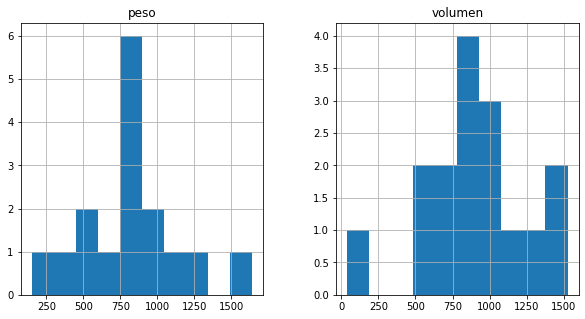

In [14]:
data.hist(figsize=(10,5))
plt.plot()

<AxesSubplot:>

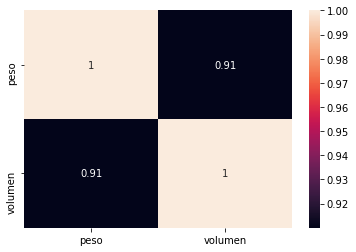

In [17]:
sns.heatmap(data.corr(), annot = True)

Text(0, 0.5, 'Peso')

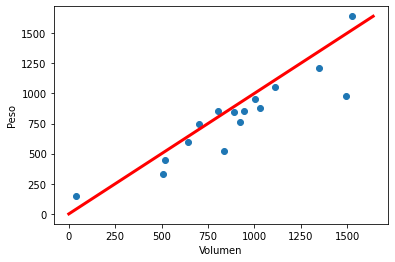

In [24]:
peso = data['peso'].values
plt.scatter(x=data['volumen'], y=peso)
plt.plot([0, max(peso)], [0, max(peso)], color = 'red', linewidth = 3)
plt.xlabel("Volumen")
plt.ylabel("Peso")

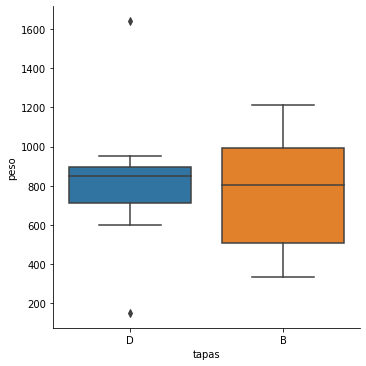

In [34]:
sns.catplot(data=data, y="peso", x="tapas", kind="box")

In [35]:
# encodeamos la variable tapa
data['tapa_enc'] = np.where(data['tapas']=='D',1, 0)

In [36]:
data

,peso,volumen,tapas,tapa_enc
0,849,890,D,1
1,850,805,D,1
2,950,1001,D,1
3,1640,1525,D,1
4,150,39,D,1
5,750,701,D,1
6,600,641,D,1
7,875,1028,D,1
8,975,1492,B,0
9,450,519,B,0


In [37]:
x = data[['volumen', 'tapa_enc']]
y = data[['peso']]

In [40]:
modelo = sm.OLS(endog=y, exog=x)
modelo = modelo.fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                   peso   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              395.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):                    4.85e-13
Time:                        18:10:53   Log-Likelihood:                         -98.625
No. Observations:                  16   AIC:                                      201.3
Df Residuals:                      14   BIC:                                      202.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\users\ewdia\scoop\apps\python\3.9.6\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Modelo Lineal

In [42]:
lm = linear_model.LinearRegression()

In [43]:
lm.fit(x, y)

LinearRegression()

In [44]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('Coeficientes:')
print(lm.coef_)
print('Intercepto:')
print(lm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE
Coeficientes:
[[  0.88941906 179.44418746]]
Intercepto:
[-83.55023425]


In [46]:
print('R^2:')
print(lm.score(x, y))

R^2:
0.8942973002237611


In [47]:
y_pred = lm.predict(x)

In [52]:
y_pred

array([[ 887.47691749],
       [ 811.8762973 ],
       [ 986.20243326],
       [1452.25802121],
       [ 130.58129658],
       [ 719.37671496],
       [ 666.0115713 ],
       [1010.2167479 ],
       [1243.46300474],
       [ 378.0582584 ],
       [ 903.70492344],
       [ 365.60639155],
       [ 658.22526261],
       [ 756.06135932],
       [ 734.71530186],
       [1117.16549808]])

In [50]:
mean_squared_error(y_pred, y)

12452.553874941257

In [66]:
y.values.max()

1640

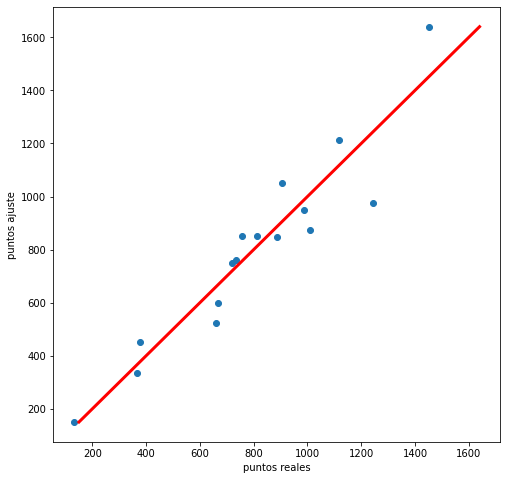

In [68]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(y_pred, y.values)
plt.xlabel("puntos reales")
plt.ylabel("puntos ajuste")
plt.plot(
    [y.values.min(), y.values.max()], [y.values.min(), y.values.max()], 
    color = 'red', linewidth = 3
)
plt.show()

In [69]:
residuos = y_pred - y.values

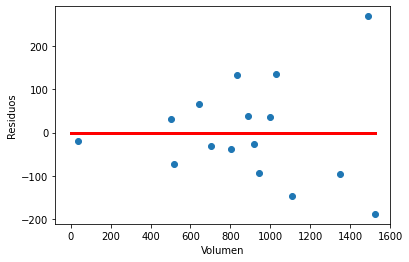

In [73]:
plt.scatter(data['volumen'], residuos)
plt.xlabel("Volumen")
plt.ylabel("Residuos")
plt.plot(
    [0, data['volumen'].values.max()], [0,0], 
    color = 'red', linewidth = 3
)
plt.show()

C:\Users\ewdia\AppData\Local\Temp/ipykernel_6644/883498994.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y.min(), y.max()], [y.values.min(), y.values.max()],
c:\users\ewdia\scoop\apps\python\3.9.6\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\ewdia\scoop\apps\python\3.9.6\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


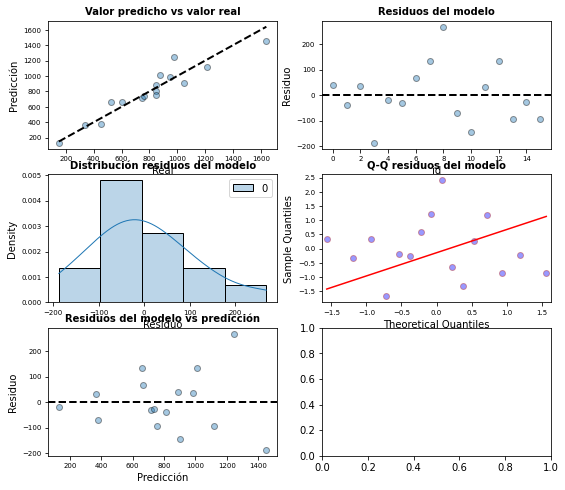

In [83]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y, y_pred, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y.min(), y.max()], [y.values.min(), y.values.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y))), residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(y_pred, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

In [79]:
sh_result = stats.shapiro(residuos)
# dar formato a la salida----------------------------------------
print("Test Shapiro-Wilk, p.valor: %5.5f" %(
sh_result.pvalue))

Test Shapiro-Wilk, p.valor: 0.79126


In [82]:
m1 = sm.OLS(y, sm.add_constant(x)).fit()
bp1 = sms.het_breuschpagan(resid = m1.resid,
exog_het = m1.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"
%(bp1))

El resultado del test Breusch-Pagan es: p.valor = 0.024


In [89]:
data

,peso,volumen,tapas,tapa_enc
0,849,890,D,1
1,850,805,D,1
2,950,1001,D,1
3,1640,1525,D,1
4,150,39,D,1
5,750,701,D,1
6,600,641,D,1
7,875,1028,D,1
8,975,1492,B,0
9,450,519,B,0


In [92]:
data1 = data[['peso', 'volumen']]
ej1_VIF = pd.DataFrame()
ej1_VIF["variable"] = data1.columns
# aplicar el metodo
ej1_VIF["VIF"] = [variance_inflation_factor(data1.values, i) for i in range(len(data1.columns))]
print(ej1_VIF)

  variable        VIF
0     peso  36.995504
1  volumen  36.995504


In [88]:
for i in range(len(data.columns)):
    print(data.values)

[[849 890 'D' 1]
 [850 805 'D' 1]
 [950 1001 'D' 1]
 [1640 1525 'D' 1]
 [150 39 'D' 1]
 [750 701 'D' 1]
 [600 641 'D' 1]
 [875 1028 'D' 1]
 [975 1492 'B' 0]
 [450 519 'B' 0]
 [1050 1110 'B' 0]
 [335 505 'B' 0]
 [525 834 'B' 0]
 [850 944 'B' 0]
 [760 920 'B' 0]
 [1212 1350 'B' 0]]
[[849 890 'D' 1]
 [850 805 'D' 1]
 [950 1001 'D' 1]
 [1640 1525 'D' 1]
 [150 39 'D' 1]
 [750 701 'D' 1]
 [600 641 'D' 1]
 [875 1028 'D' 1]
 [975 1492 'B' 0]
 [450 519 'B' 0]
 [1050 1110 'B' 0]
 [335 505 'B' 0]
 [525 834 'B' 0]
 [850 944 'B' 0]
 [760 920 'B' 0]
 [1212 1350 'B' 0]]
[[849 890 'D' 1]
 [850 805 'D' 1]
 [950 1001 'D' 1]
 [1640 1525 'D' 1]
 [150 39 'D' 1]
 [750 701 'D' 1]
 [600 641 'D' 1]
 [875 1028 'D' 1]
 [975 1492 'B' 0]
 [450 519 'B' 0]
 [1050 1110 'B' 0]
 [335 505 'B' 0]
 [525 834 'B' 0]
 [850 944 'B' 0]
 [760 920 'B' 0]
 [1212 1350 'B' 0]]
[[849 890 'D' 1]
 [850 805 'D' 1]
 [950 1001 'D' 1]
 [1640 1525 'D' 1]
 [150 39 'D' 1]
 [750 701 'D' 1]
 [600 641 'D' 1]
 [875 1028 'D' 1]
 [975 1492 'B' 0]
